## Introduction

### What is Percentile?
- Suppose the maximum marks is 95, then 95 is 100 percentile. Below value 95 we have all the values.
- Suppose the minimum marks is 0, then 0 is 0 percentile. Because no value is below this value.
- 50 percentile is called median.

In this method, we consider a threshold. For exmaple. Below 1 percentile and above 99 percentile. Every this is a outlier.

When the outlier is detected we either remove it or cap it. In this approach the capping is called winsorization.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weight-height.csv")

In [11]:
df.shape

(10000, 3)

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().mean()

Gender    0.0
Height    0.0
Weight    0.0
dtype: float64

/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_81466/3112996515.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_81466/3112996515.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


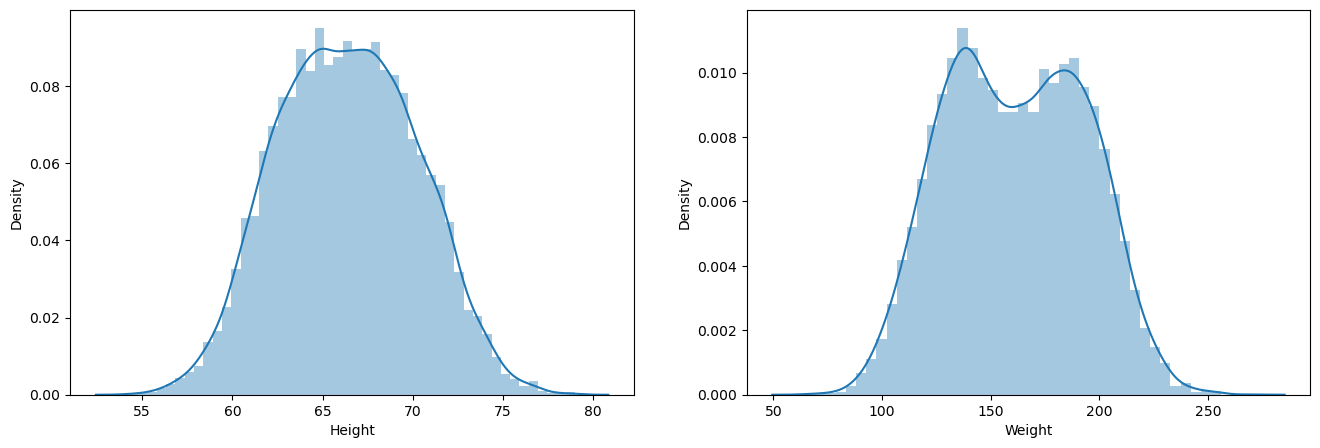

In [8]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Height'])

plt.subplot(1, 2, 2)
sns.distplot(df['Weight'])

plt.show()

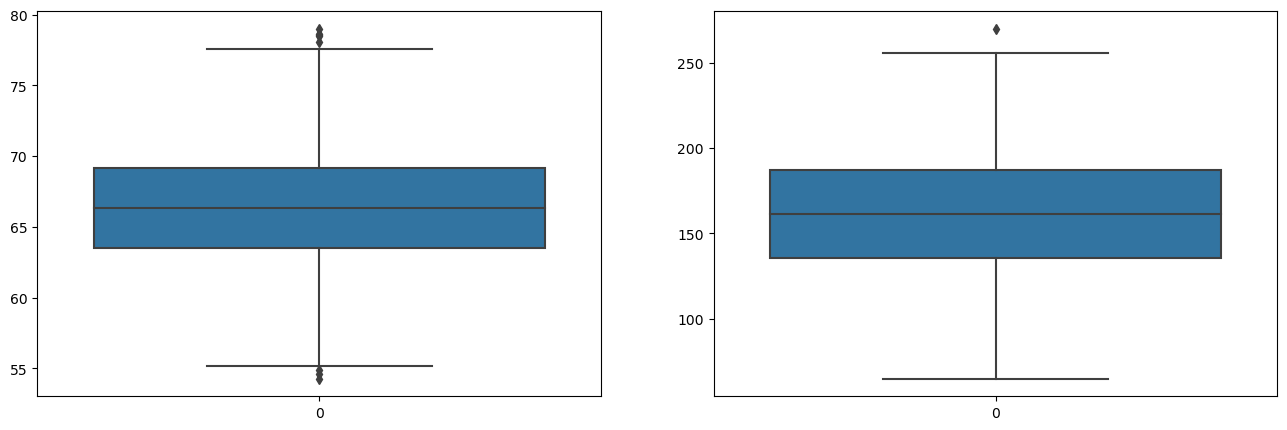

In [13]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df['Height'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Weight'])

plt.show()

In [9]:
df['Height'].skew()

0.04936908937689031

In [10]:
df['Weight'].skew()

0.03295450444592437

In [12]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [17]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [18]:
print("Upper Limit = ", upper_limit)
print("Lower Limit = ", lower_limit)

Upper Limit =  74.7857900583366
Lower Limit =  58.13441158671655


In [19]:
df[(df['Height'] >= upper_limit) | (df['Height'] <= lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
